In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# 定义计算不确定度的两种方法
def calculate_naive_uncertainties(fisher_matrix):
    return 1 / np.sqrt(np.diag(fisher_matrix))

def calculate_improved_uncertainties(fisher_matrix):
    try:
        covariance_matrix = np.linalg.inv(fisher_matrix)
        return np.sqrt(np.diag(covariance_matrix))
    except np.linalg.LinAlgError:
        print("该矩阵是奇异矩阵，没有逆矩阵。")
        return None

# 检查费舍尔矩阵的条件数
def check_condition_number(fisher_matrix):
    condition_number = np.linalg.cond(fisher_matrix)
    print(f"Condition number: {condition_number}")
    return condition_number

# 检查费舍尔矩阵的相关性（归一化协方差矩阵）
def check_correlation_matrix(fisher_matrix):
    try:
        covariance_matrix = np.linalg.inv(fisher_matrix)
        diag_sqrt = np.sqrt(np.diag(covariance_matrix))
        correlation_matrix = covariance_matrix / np.outer(diag_sqrt, diag_sqrt)
        print("Correlation matrix:\n", correlation_matrix)
        return correlation_matrix
    except np.linalg.LinAlgError:
        print("费舍尔矩阵是奇异的，无法计算相关性矩阵。")
        return None

# 设置浮点数格式为普通小数
pd.options.display.float_format = '{:.6f}'.format

# 初始化存储不确定度结果的字典
naive_results = {}
improved_results = {}
condition_numbers = {}
correlation_matrices = {}

In [2]:
# 文件路径
file_paths = [
    'Output/R_ET_1/R_ET_1_0.pkl',
    'Output/R_ET_2/R_ET_2_0.pkl',
    'Output/R_ET_3/R_ET_3_0.pkl'
]

PARAM_NAMES = [
    "Right Ascension (Ra)",  
    "Declination (Dec)", 
    "Time Delay (t)", 
    "Luminosity Distance (Dist)", 
    "Polarization Angle (Pol)",
    "Mass (M)", 
    "Inclination Angle (iota)",  
    "Mass Ratio (eta)", 
    "Initial Phase (phi)" 
]

# 处理每个文件
for i, file_path in enumerate(file_paths, start=1):
    with open(file_path, 'rb') as f:
        _, fisher_matrix, _, _ = pickle.load(f, encoding='iso-8859-1')
    
    # 检查条件数和相关性
    print(f"\n=== Detector ET_{i} ===")
    condition_numbers[f"ET_{i}"] = check_condition_number(fisher_matrix)
    correlation_matrices[f"ET_{i}"] = check_correlation_matrix(fisher_matrix)
    
    # 计算两种方法的不确定度
    naive_uncertainties = calculate_naive_uncertainties(fisher_matrix)
    improved_uncertainties = calculate_improved_uncertainties(fisher_matrix)
    
    # 存储结果
    detector_name = f"ET_{i}"
    naive_results[detector_name] = naive_uncertainties
    improved_results[detector_name] = improved_uncertainties


=== Detector ET_1 ===
Condition number: 14569596399657.941
Correlation matrix:
 [[ 1.00000000e+00  8.15809599e-02 -9.50412153e-01  4.38562164e-01
  -3.49331735e-01 -1.45514572e-01  4.08019642e-01  1.46868502e-01
  -5.42294052e-01]
 [ 8.15809599e-02  1.00000000e+00  9.55444156e-03 -2.81837126e-01
   6.61890484e-01 -3.98173932e-01 -2.74536859e-01  3.98162518e-01
   1.46599786e-01]
 [-9.50412153e-01  9.55444155e-03  1.00000000e+00 -4.33658772e-01
   3.56090296e-01 -1.06129999e-01 -3.94692687e-01  1.04695085e-01
   6.50822214e-01]
 [ 4.38562164e-01 -2.81837126e-01 -4.33658772e-01  1.00000000e+00
  -2.38562026e-01  6.19353423e-02  9.63922967e-01 -6.15646246e-02
  -1.50151814e-01]
 [-3.49331735e-01  6.61890484e-01  3.56090296e-01 -2.38562026e-01
   1.00000000e+00  3.25900729e-02 -3.19721537e-01 -3.36165240e-02
   6.73583505e-01]
 [-1.45514572e-01 -3.98173932e-01 -1.06129999e-01  6.19353423e-02
   3.25900729e-02  1.00000000e+00  4.70675029e-04 -9.99998385e-01
  -2.45926691e-01]
 [ 4.08019642

In [3]:
# 创建 DataFrame
naive_df = pd.DataFrame(naive_results, index=PARAM_NAMES)
improved_df = pd.DataFrame(improved_results, index=PARAM_NAMES)

# 合并两种方法的结果
combined_df = pd.concat(
    [naive_df.add_suffix(" (Naive)"), improved_df.add_suffix(" (Improved)")],
    axis=1
)

# 打印 DataFrame 结果
print("\n不确定度结果 DataFrame:")
display(combined_df)

# 保存结果为 CSV 文件
output_file = "combined_uncertainties.csv"
combined_df.to_csv(output_file)
print(f"结果已保存至 {output_file}")


不确定度结果 DataFrame:


,ET_1 (Naive),ET_2 (Naive),ET_3 (Naive),ET_1 (Improved),ET_2 (Improved),ET_3 (Improved)
Right Ascension (Ra),0.016681,0.005718,0.005585,0.113518,0.157768,0.126357
Declination (Dec),0.005047,0.008372,0.009217,0.046130,0.062595,0.057658
Time Delay (t),0.000108,0.000037,0.000036,0.000774,0.001024,0.000839
Luminosity Distance (Dist),0.025128,0.009132,0.008793,0.123186,0.158739,0.064816
Polarization Angle (Pol),0.009247,0.015401,0.016936,0.109489,0.254703,0.177785
Mass (M),0.000000,0.000000,0.000000,0.000434,0.000153,0.000153
Inclination Angle (iota),0.009477,0.017045,0.019261,0.044303,0.120795,0.133702
Mass Ratio (eta),0.000000,0.000000,0.000000,0.000417,0.000147,0.000147
Initial Phase (phi),0.057842,0.021023,0.020242,0.591019,0.236487,0.190637


结果已保存至 combined_uncertainties.csv


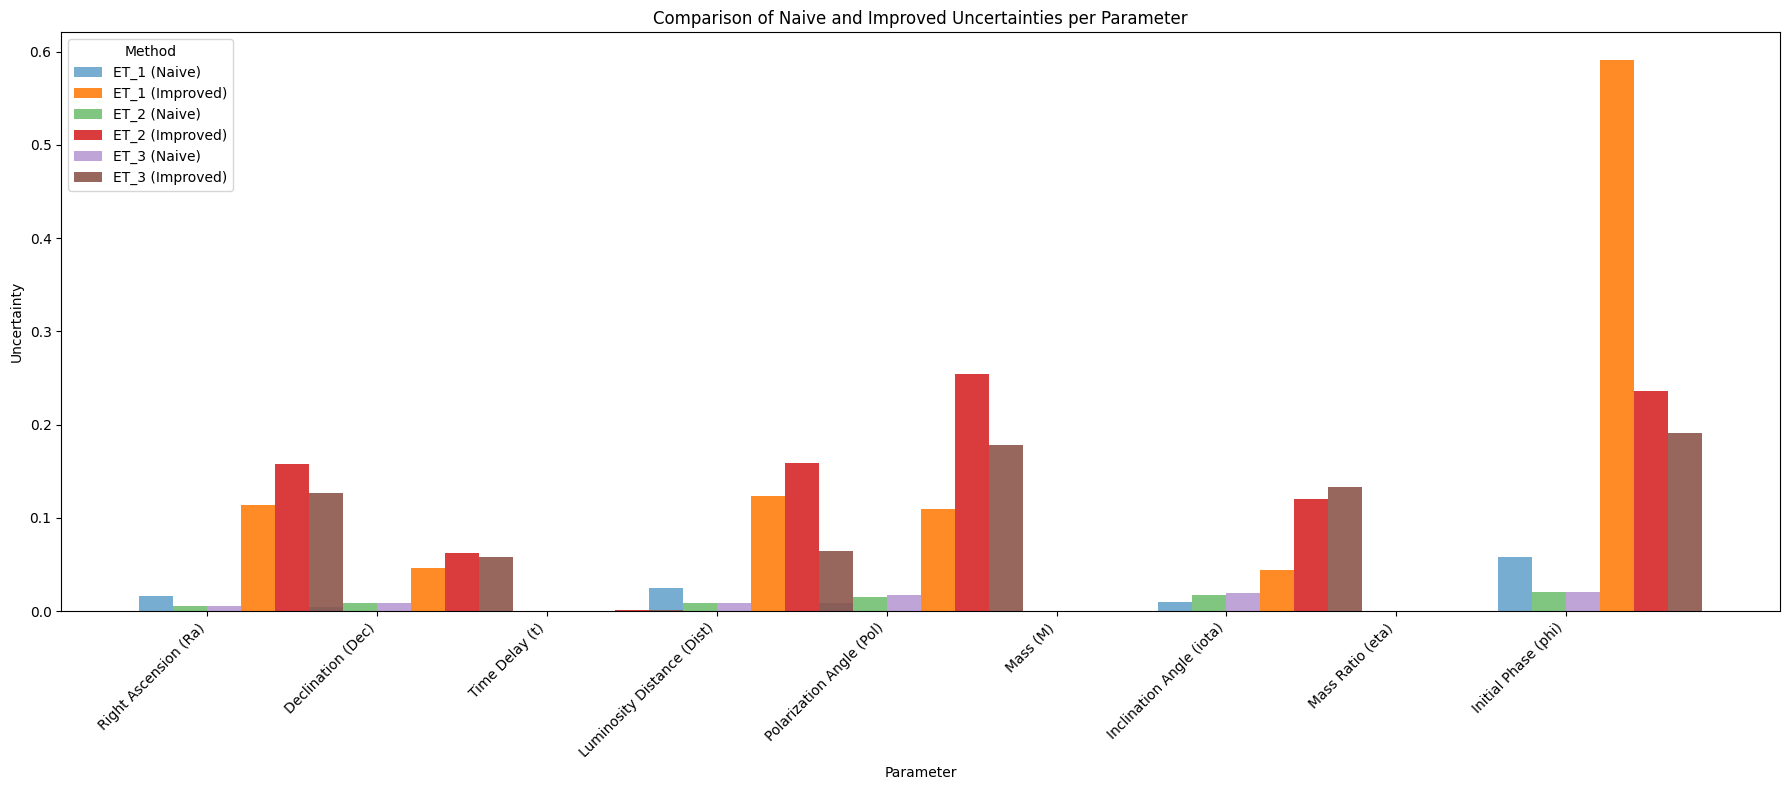

条件数已保存至 condition_numbers.csv
相关性矩阵已保存至 correlation_matrices.pkl


In [4]:
# 可视化不确定度结果
bar_width = 0.2
x = np.arange(len(PARAM_NAMES))

plt.figure(figsize=(18, 8))

# 绘制每个检测器的柱状图
for i, detector in enumerate(naive_results.keys()):
    plt.bar(x + i * bar_width, naive_df[detector], width=bar_width, label=f"{detector} (Naive)", alpha=0.6)
    plt.bar(x + (i + len(naive_results)) * bar_width, improved_df[detector], width=bar_width, label=f"{detector} (Improved)", alpha=0.9)

# 设置坐标轴和标题
plt.xticks(x + bar_width * len(naive_results) / 2, PARAM_NAMES, rotation=45, ha='right')
plt.xlabel('Parameter')
plt.ylabel('Uncertainty')
plt.title('Comparison of Naive and Improved Uncertainties per Parameter')
plt.legend(title='Method')

plt.tight_layout()
plt.show()

# 保存条件数和相关性矩阵的结果
conditions_file = "condition_numbers.csv"
pd.Series(condition_numbers).to_csv(conditions_file)
print(f"条件数已保存至 {conditions_file}")

correlation_file = "correlation_matrices.pkl"
with open(correlation_file, 'wb') as f:
    pickle.dump(correlation_matrices, f)
print(f"相关性矩阵已保存至 {correlation_file}")